### **What is Bankruptcy**?

Bankruptcy is a legal status of a person or entity that cannot repay the debts it owes to creditors. It can be the result of an inability to generate sufficient cash flow, leading to the failure to meet financial obligations. In the context of corporate bankruptcy, companies may file for bankruptcy protection in order to restructure their debts and avoid liquidation.

Corporate bankruptcy is a significant event in the business world, as it often reflects poor financial health, mismanagement, or adverse economic conditions. For creditors and investors, the ability to predict bankruptcy is crucial to mitigating risks and making informed financial decisions.

### **Importance in Financial Prediction**

Predicting bankruptcy is essential for:
- **Investors**: To manage risk by identifying distressed companies.
- **Lenders**: To assess creditworthiness and adjust loan terms or decide on financing options.
- **Regulators**: To ensure the stability of financial markets by monitoring at-risk companies.
- **Companies**: To make informed decisions about financial restructuring or risk management.


In [19]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score,ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier



In [9]:
#Reading Data
df = pd.read_excel("Bankruptcy_data (1).xlsx")



# **EDA- Exploratory Data Analysis**

In [ ]:
#Checking first few rows of the dataset
df.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [ ]:
#Checking last rows of the dataset
df.tail()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
92867,-1.488171,-0.015494,-0.758859,-0.056905,-1042.104918,0.174115,-0.326823,-6.614095,-1.846719,-0.073287,-0.557483,-0.076923,0
92868,-1.807630,0.093838,-1.204734,-0.121122,-4.530214,0.215844,-0.561155,-4.519074,-2.474549,-0.201835,-0.010544,-0.208333,0
92869,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,3274.505633,-0.168001,-0.020206,-0.105263,0
92870,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824,0
92871,-0.648028,-0.036524,-0.219774,-0.144842,0.693342,0.222476,-0.651048,-0.498483,55.624410,-0.063630,0.064574,0.062500,1


In [ ]:
#Checking shape of the dataset
df.shape

(92872, 13)

The dataset contains 92872 rows and 13 columns

In [ ]:
#Checking datatypes of each columns
df.dtypes

,0
EPS,float64
Liquidity,float64
Profitability,float64
Productivity,float64
Leverage Ratio,float64
Asset Turnover,float64
Operational Margin,float64
Return on Equity,float64
Market Book Ratio,float64
Assets Growth,float64


In [ ]:
# Displays summary information about the DataFrame, including column types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


In [ ]:
#Column Names
df.columns

Index(['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio',
       'Asset Turnover', 'Operational Margin', 'Return on Equity',
       'Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth',
       'BK'],
      dtype='object')

In [ ]:
# Groups by 'BK' and calculates the mean for each specified column
df.groupby('BK').agg({
    'Productivity': 'mean',
    'EPS': 'mean',
    'Liquidity': 'mean',
    'Profitability': 'mean',
    'Leverage Ratio': 'mean',
    'Asset Turnover': 'mean',
    'Return on Equity': 'mean',
    'Sales Growth': 'mean',
}).reset_index()

,BK,Productivity,EPS,Liquidity,Profitability,Leverage Ratio,Asset Turnover,Return on Equity,Sales Growth
0,0,-1.226630,-13.231823,-2.642535,-29.666632,1.348228,1.051111,-1.934013,1.902797
1,1,-0.602488,-219.338251,-0.767256,-8.193908,0.862939,1.466490,-31.832970,1.487656


BK (Bankruptcy Status):

0: Represents companies that are not bankrupt.
1: Represents companies that are bankrupt.

**Productivity:Not Bankrupt (0): -1.23 Bankrupt (1): -0.60**

Both groups show negative productivity, indicating inefficiencies. However, the non-bankrupt companies have lower negative productivity, suggesting they may be less inefficient.

**EPS (Earnings Per Share): Not Bankrupt (0): -13.23 Bankrupt (1): -219.34**

The bankrupt companies have a significantly lower EPS, reflecting severe financial losses. This stark difference highlights the struggles faced by the bankrupt companies.

**Liquidity:Not Bankrupt (0): -2.64 Bankrupt (1): -0.77**

Both groups have negative liquidity values, indicating difficulties in meeting short-term obligations. However, the non-bankrupt companies are in a worse liquidity position.

**Profitability:Not Bankrupt (0): -29.67 Bankrupt (1): -8.19**

Non-bankrupt companies show much deeper losses, suggesting they are less capable of generating profit compared to the bankrupt group.

**Leverage Ratio: Not Bankrupt (0): 1.35 Bankrupt (1): 0.86**

The non-bankrupt companies rely more on debt for financing, while the bankrupt companies are slightly less leveraged, which may indicate a more conservative approach but does not help avoid bankruptcy.

**Asset Turnover: Not Bankrupt (0): 1.05 Bankrupt (1): 1.47**

The bankrupt companies have better asset turnover, meaning they generate more sales relative to their assets. This could suggest that, despite being bankrupt, they were able to efficiently use their assets to drive sales.

**Return on Equity (ROE):Not Bankrupt (0): -1.93 Bankrupt (1): -31.83**

Both groups show negative ROE, with the bankrupt companies having a significantly lower value, indicating they are unable to provide returns to shareholders.

**Sales Growth:Not Bankrupt (0): 1.90 Bankrupt (1): 1.49**

Both groups are experiencing positive sales growth, indicating that they are increasing sales over time. However, the non-bankrupt companies are showing a stronger growth rate.

In [ ]:
df_cols = df.columns[:12]

**Outliers**

In [ ]:
# Function to identify number of outliers in each features
def identify_outliers(df_cols):
    Q1 = df[df_cols].quantile(0.25)
    Q3 = df[df_cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[df_cols] < lower_bound) | (df[df_cols] > upper_bound)]
    return len(outliers)

for i in df_cols:
    print("Number Of Outliers in", i)
    print(identify_outliers(i))


Number Of Outliers in EPS
8396
Number Of Outliers in Liquidity
4467
Number Of Outliers in Profitability
14150
Number Of Outliers in Productivity
13229
Number Of Outliers in Leverage Ratio
10342
Number Of Outliers in Asset Turnover
3706
Number Of Outliers in Operational Margin
15577
Number Of Outliers in Return on Equity
13064
Number Of Outliers in Market Book Ratio
15997
Number Of Outliers in Assets Growth
11995
Number Of Outliers in Sales Growth
12436
Number Of Outliers in Employee Growth
12673


**Null Values**

In [10]:
# Checks number of nulls
df.isna().sum()

,0
EPS,5
Liquidity,247
Profitability,247
Productivity,247
Leverage Ratio,26
Asset Turnover,247
Operational Margin,5557
Return on Equity,8
Market Book Ratio,57
Assets Growth,6701


In [ ]:
# Generates summary statistics for numerical columns and transposes the result for better readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EPS,92867.0,-14.461355,2195.467288,-3.840000e+05,-0.140000,0.330000,1.530000,55339.00
Liquidity,92625.0,-2.631237,121.610921,-2.596852e+04,0.020000,0.190000,0.400000,1.00
Profitability,92625.0,-29.537274,677.230667,-7.968200e+04,-0.640000,0.070000,0.310000,140.58
Productivity,92625.0,-1.222870,35.885556,-5.093000e+03,-0.060000,0.060000,0.110000,1102.00
Leverage Ratio,92846.0,1.345316,253.038093,-7.811000e+03,0.000000,0.280000,0.820000,75970.38
Asset Turnover,92625.0,1.053613,2.115945,-3.159000e+01,0.390000,0.830000,1.390000,276.38
Operational Margin,87315.0,-7.915485,214.460079,-3.017570e+04,-0.030000,0.060000,0.140000,394.47
Return on Equity,92864.0,-2.112382,352.596902,-8.887514e+04,-0.080000,0.030000,0.070000,39500.00
Market Book Ratio,92815.0,358.506265,26063.637981,-3.151500e+06,11.200000,58.280000,240.140000,3455419.33
Assets Growth,86171.0,1.294075,73.769522,-1.000000e+00,-0.052596,0.051844,0.192062,14231.00


**Visualizations**

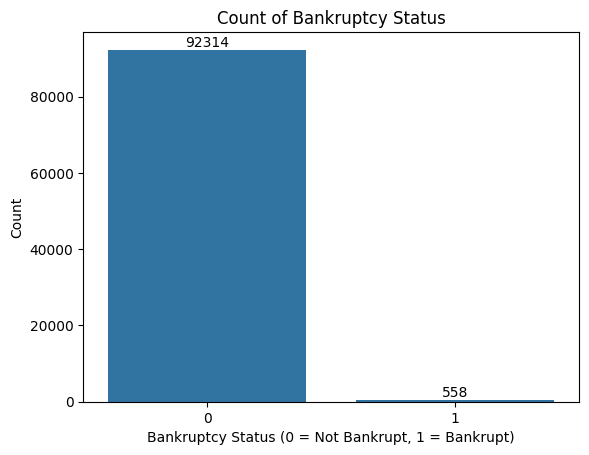

In [ ]:
# Creates a countplot to visualize the distribution of bankruptcy status (0 or 1)
ax=sns.countplot(x='BK', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
    plt.xlabel('Bankruptcy Status (0 = Not Bankrupt, 1 = Bankrupt)')
    plt.ylabel('Count')
    plt.title('Count of Bankruptcy Status')
    plt.show()



Non-bankrupt companies: 92,314

Bankrupt companies: 558

This significant difference in sample size (a large number of non-bankrupt vs. a small number of bankrupt companies) suggests that the dataset is imbalanced or prone to outlier and contains missing values as well.

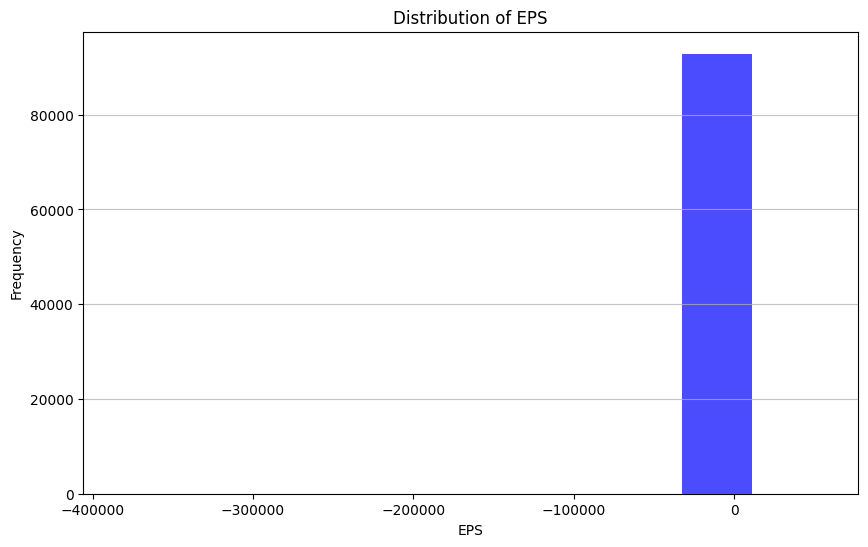

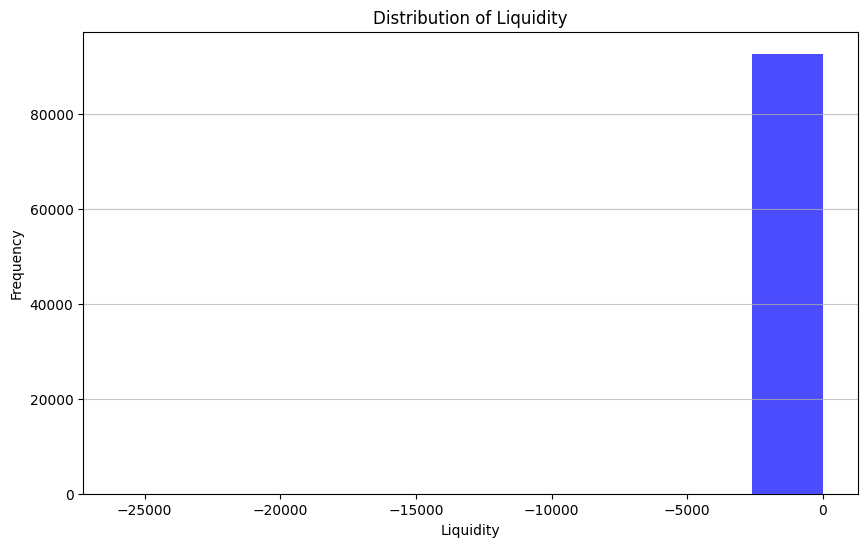

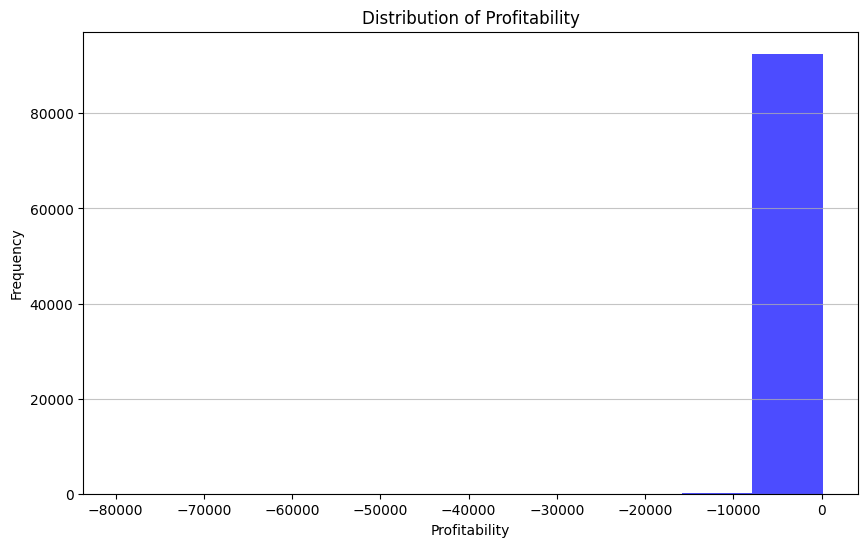

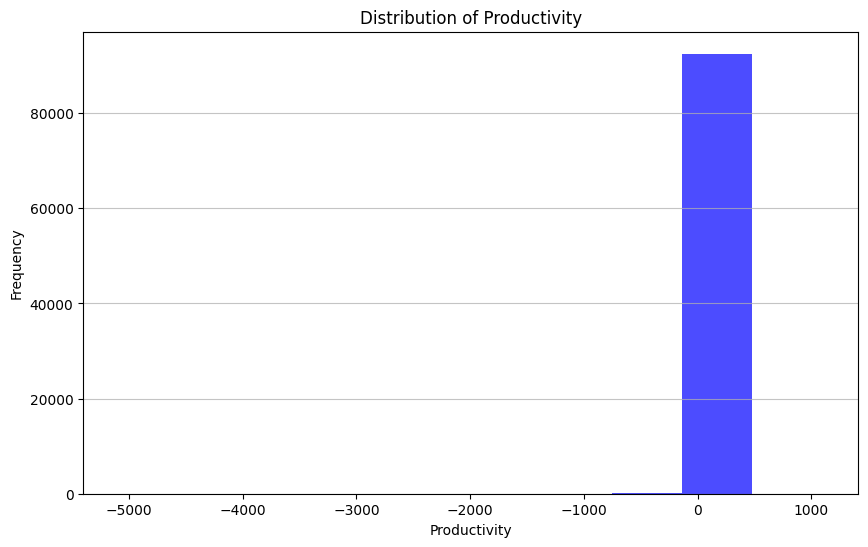

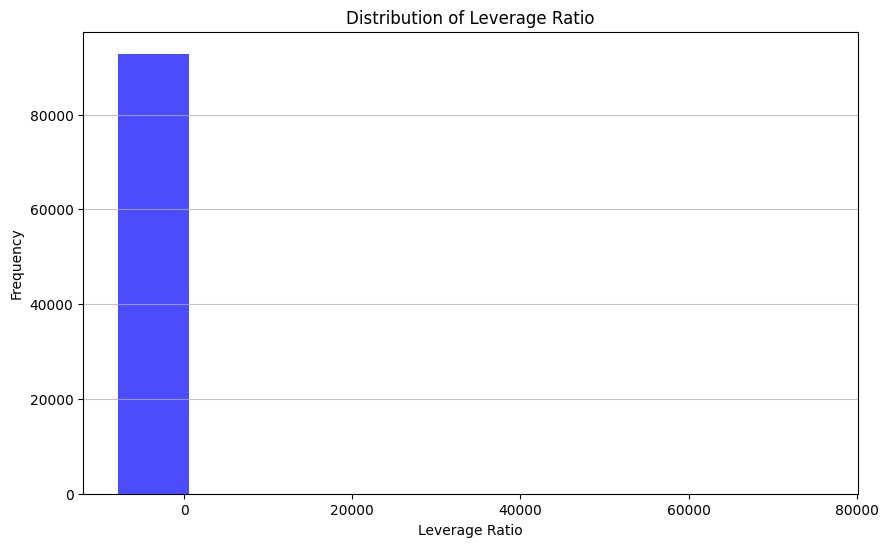

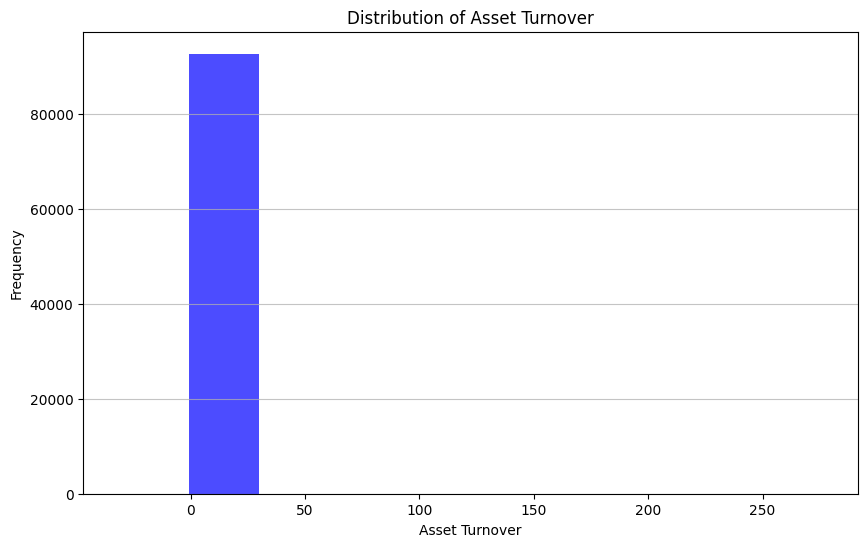

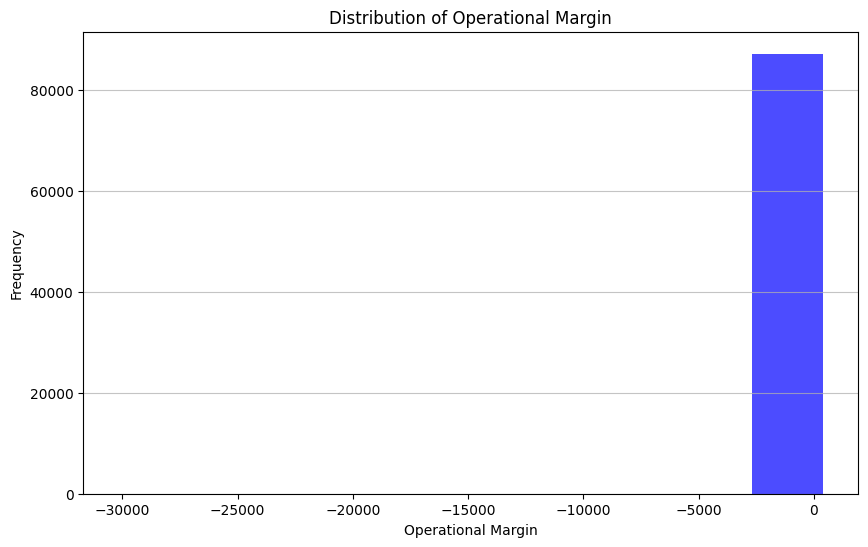

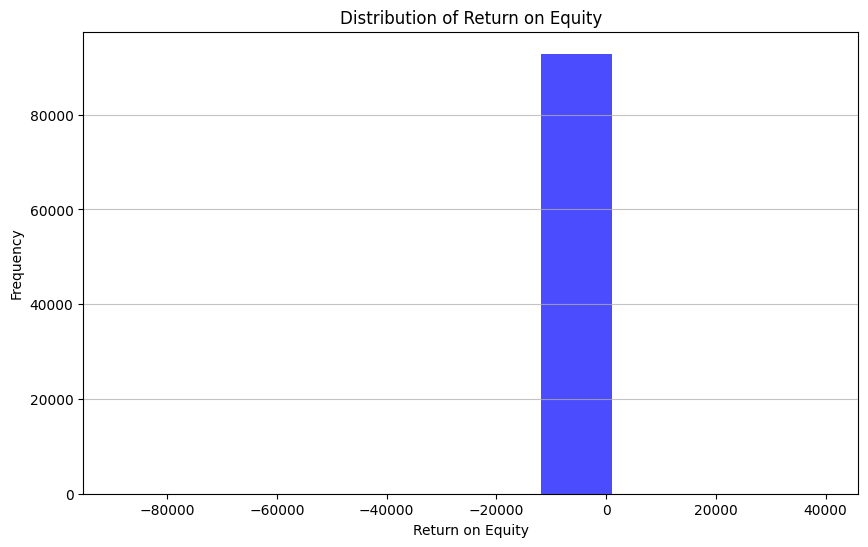

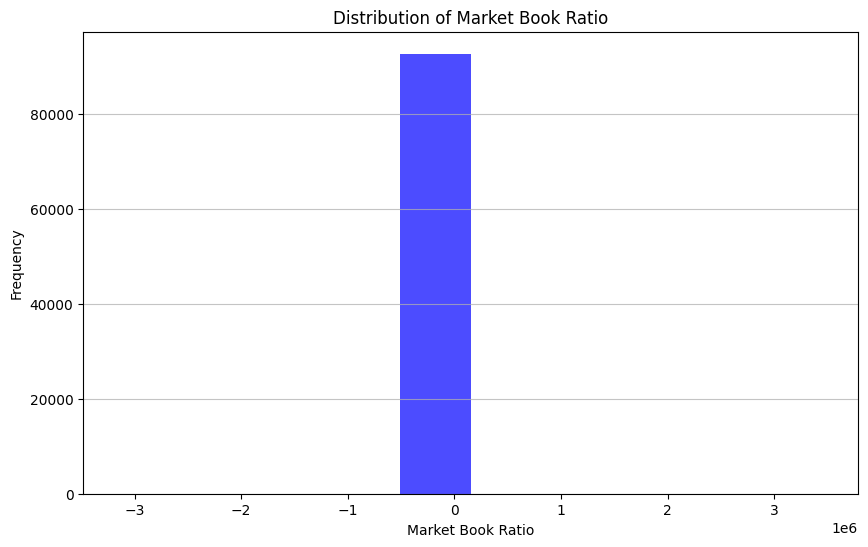

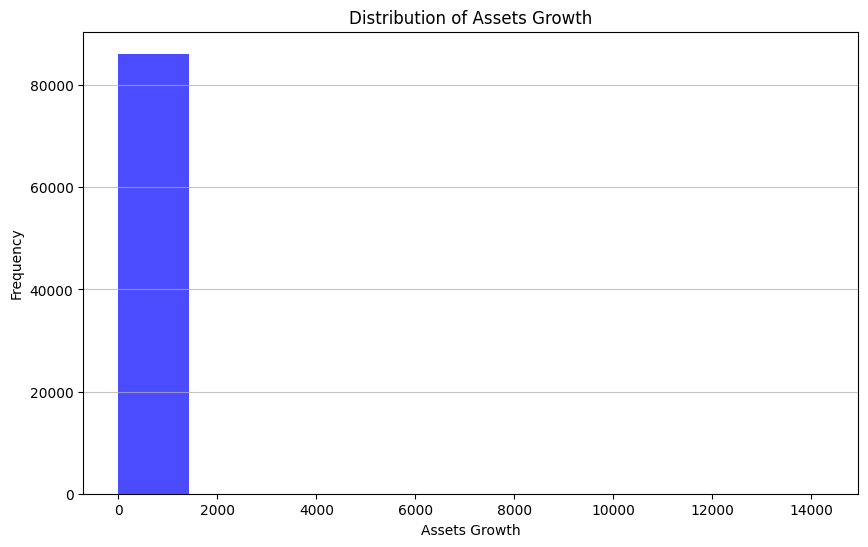

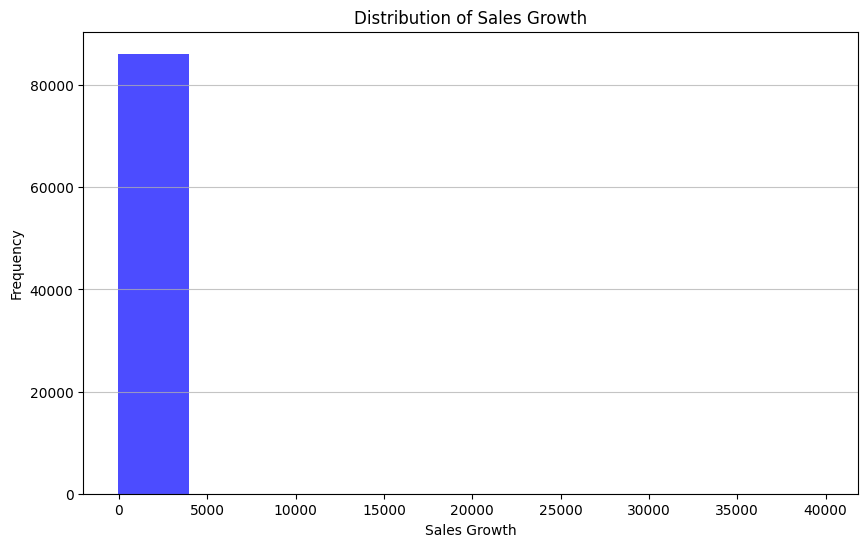

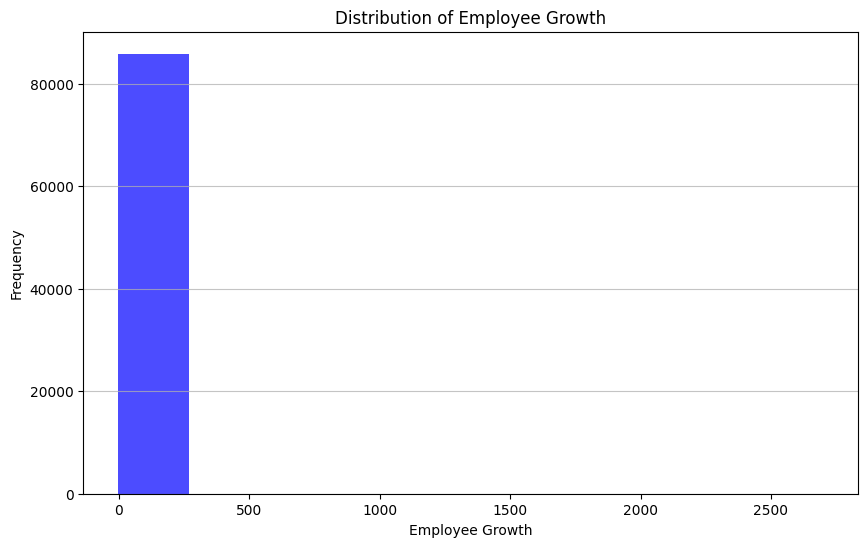

In [ ]:
#creates a histogram to show the distribution of each feature
for i in df_cols:
    plt.figure(figsize=(10, 6))
    plt.hist(df[i], color='blue', alpha=0.7)
    plt.title('Distribution of ' + i)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1318: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1325: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/usr/local/lib/python3.10/dist-packages/matplotlib/ticker.py:525: UserWarning: Warning: converting a masked element to nan.
  else fmt % arg)


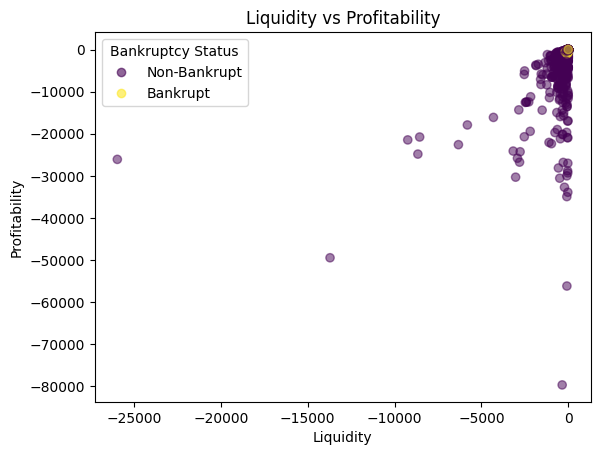

In [ ]:
# Creates a scatter plot of Liquidity vs Profitability, colored by Bankruptcy status
scatter = plt.scatter(df['Liquidity'], df['Profitability'], c=df['BK'], cmap='viridis', alpha=0.5)

plt.title('Liquidity vs Profitability')
plt.xlabel('Liquidity')
plt.ylabel('Profitability')

handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend_labels = ['Non-Bankrupt', 'Bankrupt']

plt.legend(handles, legend_labels, title="Bankruptcy Status")

plt.show()


The majority of the data points are clustered in the upper-right corner, indicating companies with lower negative values for both liquidity and profitability.
A few outliers show very low liquidity (down to -25,000) and extreme negative profitability (as low as -80,000). These outliers likely represent companies in severe financial distress.
Overall, there seems to be a positive relationship, where better (less negative) liquidity is associated with better profitability.

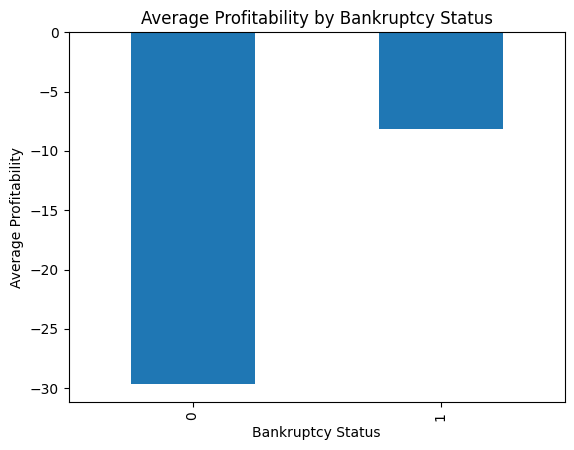

In [ ]:
# Groups by 'BK' and calculates the average profitability for each bankruptcy status
mean_profitability = df.groupby('BK')['Profitability'].mean()
mean_profitability.plot(kind='bar')
plt.title('Average Profitability by Bankruptcy Status')
plt.xlabel('Bankruptcy Status')
plt.ylabel('Average Profitability')
plt.show()


Non-bankrupt companies (BK = 0) have a much lower average profitability (around -30) compared to bankrupt companies (BK = 1) whose profitability averages around -10.
This suggests that while both groups face financial difficulties, non-bankrupt companies are performing worse in terms of profitability.

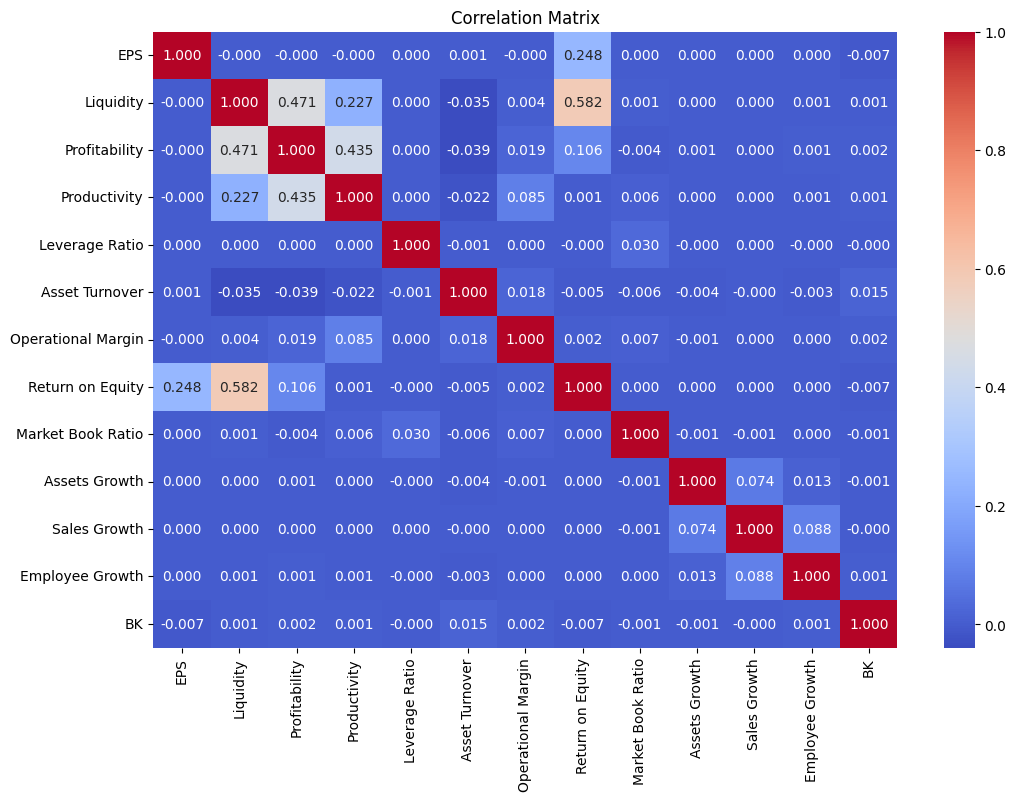

In [ ]:
# Calculates the correlation matrix for numerical features in the DataFrame
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Weak Correlation with Bankruptcy:** Most financial metrics show weak correlations with the bankruptcy status (BK). This could imply that no single metric strongly determines bankruptcy, and the risk might depend on a combination of factors.

**Important Relationships:** The strongest relationships are between liquidity and return on equity, as well as profitability and liquidity. These correlations indicate that companies that are better at managing their short-term finances and have higher profitability tend to perform better in terms of shareholder returns.

# **Data Preprocessing**

In [11]:
# Identifying and Removing Null Values
percentage = (pd.isnull(df).sum() / len(df) * 100).round(2)
percentage.astype(str) + '%'
print(percentage.astype(str) + '%')

EPS                   0.01%
Liquidity             0.27%
Profitability         0.27%
Productivity          0.27%
Leverage Ratio        0.03%
Asset Turnover        0.27%
Operational Margin    5.98%
Return on Equity      0.01%
Market Book Ratio     0.06%
Assets Growth         7.22%
Sales Growth          7.22%
Employee Growth       7.55%
BK                     0.0%
dtype: object


**Minor missing values (under 1%):** EPS, Liquidity, Profitability, Productivity, Leverage Ratio, Return on Equity, Market Book Ratio.

**Moderate missing values (around 6-7%):** Operational Margin, Assets Growth, Sales Growth, Employee Growth.

**Replacing missing values with the median:**

**Robust to Outliers:** The median is less sensitive to extreme values than the mean, making it a better choice when data is skewed or has outliers.

**Central Tendency:** The median represents the "middle" value of the data, preserving the central tendency of the distribution, especially when there are a few missing values.

In [12]:
# Replaces missing values with the median of each column
df.fillna(df.median(), inplace=True)


df.isnull().sum()



,0
EPS,0
Liquidity,0
Profitability,0
Productivity,0
Leverage Ratio,0
Asset Turnover,0
Operational Margin,0
Return on Equity,0
Market Book Ratio,0
Assets Growth,0


In [ ]:
df.shape

(92872, 13)

# **Using Random Forest and XG-Boost**

## **Experimental Setup**

In [13]:
# Creates feature set X by dropping the 'BK' column, and y as the target variable
X = df.drop('BK', axis=1)
y = df['BK']


In [14]:
# Splits the data into training and testing sets with 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [15]:
# Checks the shape of X_train,X_test,y_train,y_test

print("Shape of X train: ", X_train.shape)
print("Shape of X test: ", X_test.shape)
print("Shape of y train: ", y_train.shape)
print("Shape of y test: ", y_test.shape)

Shape of X train:  (74297, 12)
Shape of X test:  (18575, 12)
Shape of y train:  (74297,)
Shape of y test:  (18575,)


In [16]:
# Scales features using RobustScaler, which handles outliers by using the median and interquartile range
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Applies SMOTE to balance the classes by oversampling the minority class in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [18]:
#Checks the shape after using smote
print("After Using Smote")
print("Shape of X train: ", X_train_resampled.shape)
print("Shape of y train: ", y_train_resampled.shape)

After Using Smote
Shape of X train:  (147706, 12)
Shape of y train:  (147706,)


# **Model Creation, Training, Validation and Evaluation**

##  **Random Forest**

In [20]:
# Initializes and trains a RandomForestClassifier on resampled data, predicts then evaluates it on the test set
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate on test set
y_pred = rf_clf.predict(X_test_scaled)
y_probs = rf_clf.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_probs))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18461
           1       0.14      0.26      0.18       114

    accuracy                           0.99     18575
   macro avg       0.57      0.63      0.59     18575
weighted avg       0.99      0.99      0.99     18575

AUC Score: 0.9117302288275806


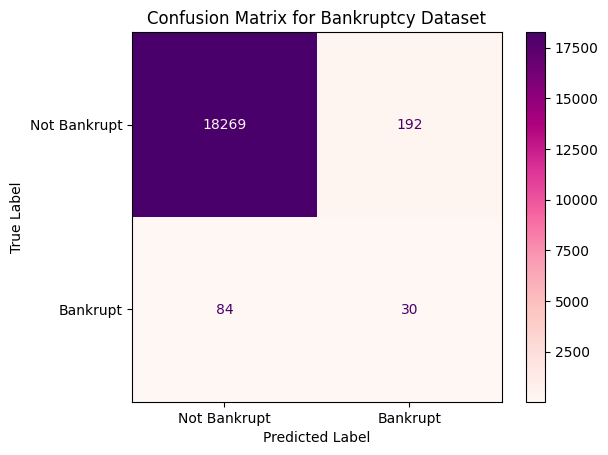

In [32]:
class_names = ['Not Bankrupt', 'Bankrupt']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=class_names)
disp.plot(cmap='RdPu')
plt.title('Confusion Matrix for Bankruptcy Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

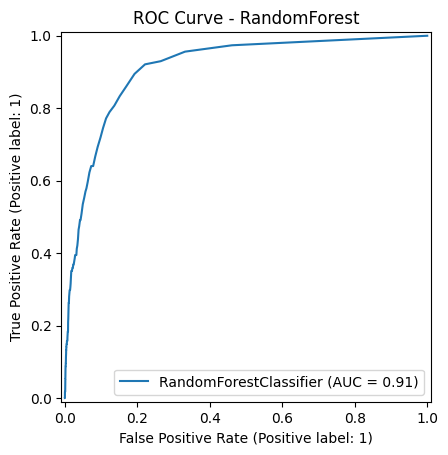

In [30]:
# Plot ROC Curve
RocCurveDisplay.from_estimator(rf_clf, X_test_scaled, y_test)
plt.title("ROC Curve - RandomForest")
plt.show()



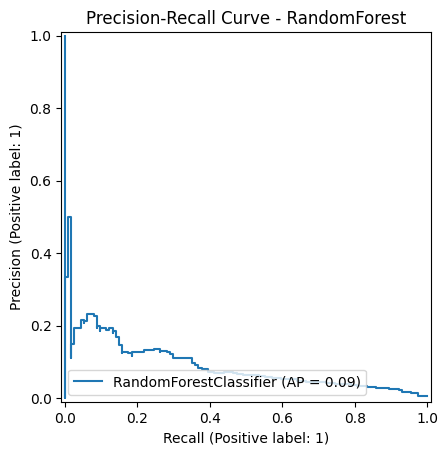

In [31]:
# Plot Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(rf_clf, X_test_scaled, y_test)
plt.title("Precision-Recall Curve - RandomForest")
plt.show()

## **Random Forest with HyperParameter Tuning**

In [33]:
#Param_grid defines hyperparameters for tuning, and RandomizedSearchCV is used to find the best parameters for a
#RandomForestClassifier,then fits the model and evaluates its performance.

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'max_samples': [0.5, 0.75, 1.0]
}

rf_clf = RandomForestClassifier(random_state=42)


random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid,
                                   n_iter=100, cv=5, scoring='f1', n_jobs=-1, verbose=2, random_state=42)


random_search.fit(X_train_resampled, y_train_resampled)


best_rf_clf = random_search.best_estimator_
y_pred_tuned = best_rf_clf.predict(X_test_scaled)

print("\nWith Hyperparameter Tuning:")
print("Best Parameters:", random_search.best_params_)
print(classification_report(y_test, y_pred_tuned))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("AUC Score:", roc_auc_score(y_test, best_rf_clf.predict_proba(X_test_scaled)[:, 1]))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



With Hyperparameter Tuning:
Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.0, 'max_samples': 0.75, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy'}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18461
           1       0.12      0.31      0.17       114

    accuracy                           0.98     18575
   macro avg       0.56      0.65      0.58     18575
weighted avg       0.99      0.98      0.99     18575

AUC Score: 0.8934800437527379


**Best Parameters**

n_estimators: 50 - Number of trees in the forest, More trees improve performance but increase computational cost.

min_samples_split: 2 - Minimum samples required to split an internal node, Smaller values allow deeper trees.

min_samples_leaf: 2 - Minimum samples required to be at a leaf node, Ensures each leaf has enough data to generalize.

min_impurity_decrease: 0.0 - Minimum decrease in impurity required to split a node, 0.0 means no threshold for splitting.

max_samples: 0.75 - Fraction of samples to use for each tree, Using a subset can reduce overfitting and speed up training.

max_leaf_nodes: None - Maximum number of leaf nodes; None allows trees to grow without limitation.

max_features: 'log2' -  Number of features to consider when looking for the best split, 'log2' considers the log base 2 of total features.

max_depth: None - Maximum depth of the tree; None allows the tree to grow as deep as needed until all leaves are pure.

criterion: 'entropy' - The function to measure the quality of a split, 'entropy' uses information gain based on entropy.

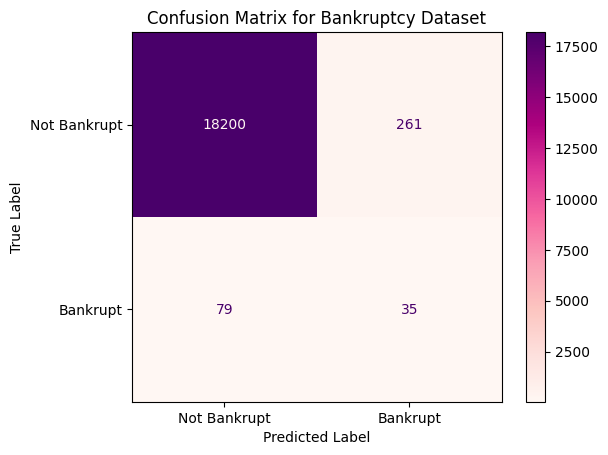

In [34]:
class_names = ['Not Bankrupt', 'Bankrupt']
cm = confusion_matrix(y_test,y_pred_tuned)
disp = ConfusionMatrixDisplay(cm,display_labels=class_names)
disp.plot(cmap='RdPu')
plt.title('Confusion Matrix for Bankruptcy Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

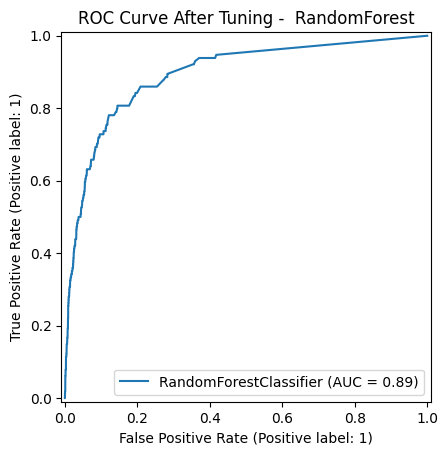

In [35]:
# Plot ROC Curve
RocCurveDisplay.from_estimator(best_rf_clf, X_test_scaled, y_test)
plt.title("ROC Curve After Tuning -  RandomForest")
plt.show()



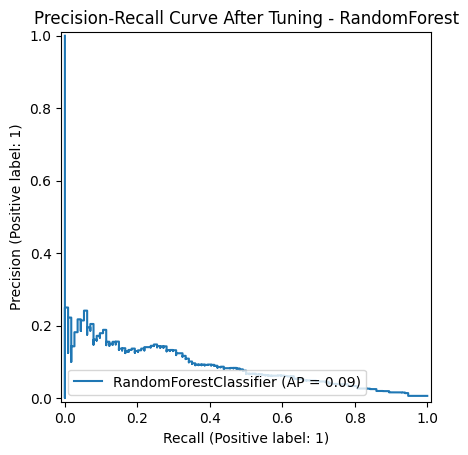

In [36]:
# Plot Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(best_rf_clf, X_test_scaled, y_test)
plt.title("Precision-Recall Curve After Tuning - RandomForest")
plt.show()

## **XG BOOST**

In [37]:
#Initializes and trains an XGBoost classifier, makes predictions on the test set, and evaluates the model's performance
#using classification metrics, confusion matrix, and AUC score without hyperparameter tuning.

xgb_clf = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42
)


xgb_clf.fit(X_train_resampled, y_train_resampled)


y_pred = xgb_clf.predict(X_test_scaled)

y_probs = xgb_clf.predict_proba(X_test_scaled)[:, 1]

print("Without Hyperparameter Tuning:")
print(classification_report(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_probs))

Without Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     18461
           1       0.08      0.50      0.14       114

    accuracy                           0.96     18575
   macro avg       0.54      0.73      0.56     18575
weighted avg       0.99      0.96      0.98     18575

AUC Score: 0.9037140410747361


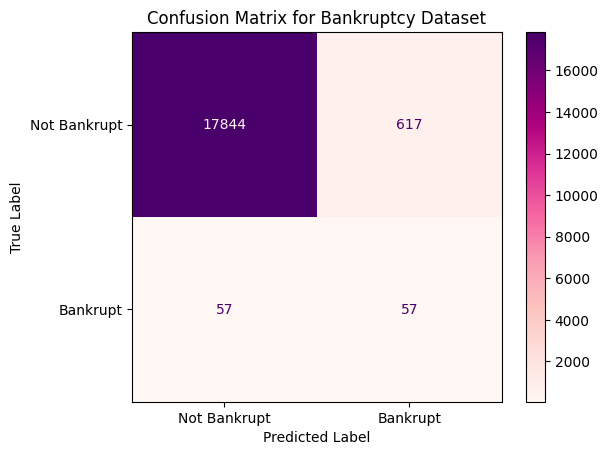

In [39]:
class_names = ['Not Bankrupt', 'Bankrupt']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=class_names)
disp.plot(cmap='RdPu')
plt.title('Confusion Matrix for Bankruptcy Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

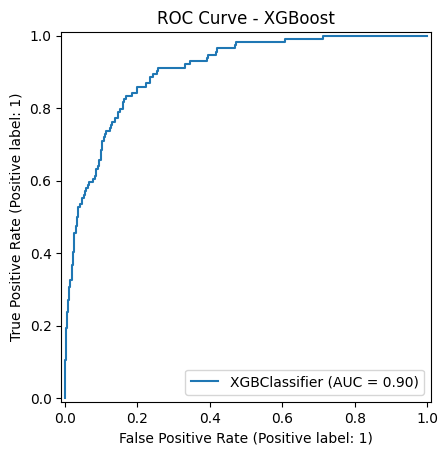

In [40]:
# Plot ROC Curve
RocCurveDisplay.from_estimator(xgb_clf, X_test_scaled, y_test)
plt.title("ROC Curve - XGBoost")
plt.show()


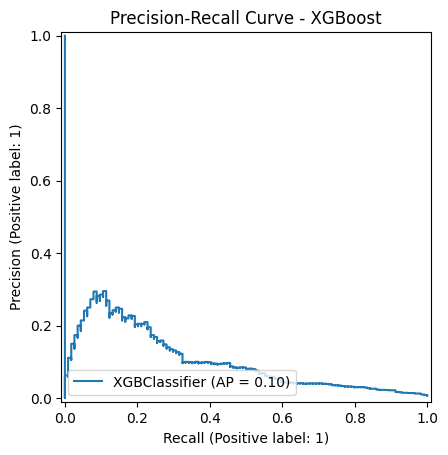

In [41]:
# Plot Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(xgb_clf, X_test_scaled, y_test)
plt.title("Precision-Recall Curve - XGBoost")
plt.show()

## **XG-Boost with HyperParameter Tuning**

In [43]:
#Defines a grid of hyperparameters for tuning, applies RandomizedSearchCV to find the best parameters for an XGBoost classifier,
#trains the model on the resampled data, and evaluates its performance with classification metrics, confusion matrix, and AUC score.

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 1.5, 2]
}


xgb_clf_tuned = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
)


random_search = RandomizedSearchCV(
    estimator=xgb_clf_tuned,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)


random_search.fit(X_train_resampled, y_train_resampled)


best_xg_clf = random_search.best_estimator_


y_pred_tuned = best_xg_clf.predict(X_test_scaled)
y_probs_tuned = best_xg_clf.predict_proba(X_test_scaled)[:, 1]

print("\nWith Hyperparameter Tuning:")
print("Best Parameters:", random_search.best_params_)
print(classification_report(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("AUC Score:", roc_auc_score(y_test, y_probs_tuned))

Fitting 5 folds for each of 100 candidates, totalling 500 fits

With Hyperparameter Tuning:
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0.5, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18461
           1       0.17      0.32      0.22       114

    accuracy                           0.99     18575
   macro avg       0.58      0.65      0.61     18575
weighted avg       0.99      0.99      0.99     18575

Confusion Matrix:
 [[18282   179]
 [   78    36]]
AUC Score: 0.9177170079741361


**Best Parameters**

subsample: 1.0 - Uses the full dataset for training each boosting round, which can improve model performance but might increase the risk of overfitting.

reg_lambda: 1.5 - Adds L2 regularization to control overfitting by penalizing large weights, with moderate strength to prevent overfitting.

reg_alpha: 0.5 - Adds L1 regularization, penalizing large weights to further help in reducing overfitting.

n_estimators: 500 - The model will use 500 boosting rounds, allowing it to learn complex relationships but requiring more training time.

max_depth: 10 - Allows the trees to grow to a maximum depth of 10, enabling more complex decision boundaries.

learning_rate: 0.2 - The step size at each iteration; a higher rate of 0.2 may speed up training, but careful tuning is needed to avoid overfitting.

gamma: 0 - No minimum loss reduction required to make further splits; this provides more flexibility in the decision-making process of the tree-building.

colsample_bytree: 0.8 - Uses 80% of the features for each tree, which helps in creating diverse trees and reduces overfitting.

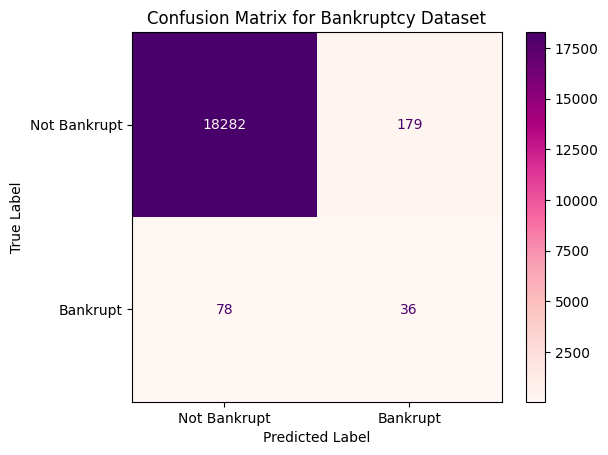

In [44]:
class_names = ['Not Bankrupt', 'Bankrupt']
cm = confusion_matrix(y_test,y_pred_tuned)
disp = ConfusionMatrixDisplay(cm,display_labels=class_names)
disp.plot(cmap='RdPu')
plt.title('Confusion Matrix for Bankruptcy Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

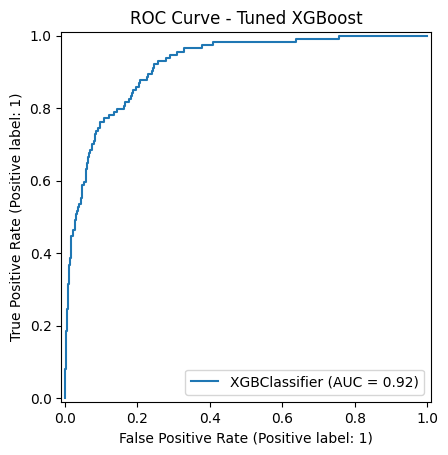

In [45]:
# Plot ROC Curve
RocCurveDisplay.from_estimator(best_xg_clf, X_test_scaled, y_test)
plt.title("ROC Curve - Tuned XGBoost")
plt.show()


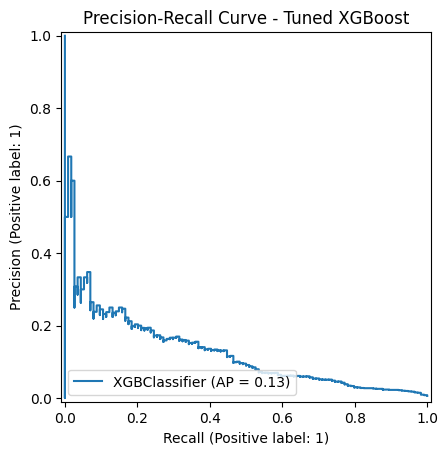

In [46]:
# Plot Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(best_xg_clf, X_test_scaled, y_test)
plt.title("Precision-Recall Curve - Tuned XGBoost")
plt.show()

# **Model Comparison**

| Model                        | Precision (Not Bankrupt) | Recall (Not Bankrupt) | F1-Score (Not Bankrupt) | Precision (Bankrupt) | Recall (Bankrupt) | F1-Score (Bankrupt) | Accuracy | AUC  | Macro Avg F1-Score |
|------------------------------|--------------------------|------------------------|--------------------------|-----------------------|--------------------|----------------------|----------|------|---------------------|
| Random Forest (Without Tuning)| 1.00                     | 0.99                    | 0.99                     | 0.14                  | 0.26               | 0.18                 | 0.99     | 0.91 | 0.59                |
| Random Forest (With Tuning)   | 1.00                     | 0.99                    | 0.99                     | 0.12                  | 0.31               | 0.17                 | 0.98     | 0.89 | 0.58                |
| XGBoost (Without Tuning)      | 1.00                     | 0.97                    | 0.98                     | 0.08                  | 0.50               | 0.14                 | 0.96     | 0.90 | 0.56                |
| XGBoost (With Tuning)         | 1.00                     | 0.99                    | 0.99                     | 0.17                  | 0.32               | 0.22                 | 0.99     | 0.92 | 0.61                |


# **END of the Coding Book**